In [1]:
import json
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt
import itertools # mote up later
from nltk import bigrams, ngrams, trigrams
import collections # must move up
import nltk
from nltk.corpus import stopwords

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open("/content/doqa-cooking-test-v2.1.json", 'r') as file:
    json_data = json.load(file)

In [4]:
# Access the 'data' key
data = json_data['data']

In [5]:
# Create lists to store the extracted data
titles = []
backgrounds = []
all_paragraphs = []
for entry in data:
   title = entry["title"]
   background = entry["background"]
   paragraphs = [p["context"] for p in entry["paragraphs"]]
   # Store each variable in separate lists
   titles.append(title)
   backgrounds.append(background)
   all_paragraphs.append(paragraphs)
# Now you have three separate lists: titles, backgrounds, and all_paragraphs
# Perform NLP analysis or manipulate the data as needed
# For example, you can convert them into data frames
title_df = pd.DataFrame({'Title': titles})
background_df = pd.DataFrame({'Background': backgrounds})
paragraphs_df = pd.DataFrame({'Paragraphs': all_paragraphs})
# Now you have three separate data frames for each variable
# You can access, analyze, and manipulate the data in the data frames as needed

#This code will create three separate lists ('titles', 'backgrounds', and 'all_paragraphs') to store the extracted data, and you can perform NLP analysis or further manipulation on these lists. Additionally, the code demonstrates how to convert these lists into separate data frames if you prefer to work with data frames.


In [6]:
print(title_df)

                                                 Title
0                             Canning chili with beans
1                            Is rare duck breast safe?
2    Why would I prefer carbon steel (rust prone) k...
3         How do you prepare fresh fennel for cooking?
4                            Cracking open a pistachio
..                                                 ...
395                  First onion or first minced meat?
396       Metal dust/shavings in food from knife wear?
397   How to make corn nuts from fresh corn on the cob
398  Emergency Coffee via Chocolate Covered Coffee ...
399  How to gauge orzo's change in volume from dry ...

[400 rows x 1 columns]


Begin Cleaning

In [7]:
title_df_list = title_df['Title'].tolist()

In [8]:
title_df_list[:3]

['Canning chili with beans',
 'Is rare duck breast safe?',
 'Why would I prefer carbon steel (rust prone) kitchen knife?']

In [9]:
def clean_string(text): # can be Title, Background, Paragraphs
    """re.sub(pattern, repl, string).
    Returns the string obtained by replacing the leftmost
    non-overlapping occurrences of pattern in string by the
    replacement thus removing any urls
    """
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(text)).split())

In [10]:
TextOnlyTitle = [clean_string(Title) for Title in title_df_list]#can be Title, Background, Paragraphs

In [11]:
TextOnlyTitle[:1] # Can be Title, Background, Paragraphs

['Canning chili with beans']

In [12]:
ListlowercasewordsTitle = [Title.lower().split() for Title in TextOnlyTitle]

In [13]:
ListlowercasewordsTitle[:1]

[['canning', 'chili', 'with', 'beans']]

In [14]:
data = ListlowercasewordsTitle[:3]
for x in data:
    print(x, end=' ')

['canning', 'chili', 'with', 'beans'] ['is', 'rare', 'duck', 'breast', 'safe'] ['why', 'would', 'i', 'prefer', 'carbon', 'steel', 'rust', 'prone', 'kitchen', 'knife'] 

In [15]:
TextOnlyTitle = list(itertools.chain(*ListlowercasewordsTitle))

In [16]:
TextOnlyTitle[:2]

['canning', 'chili']

In [17]:
len(TextOnlyTitle)

3451

In [18]:
UniqueWordsTitle = set(TextOnlyTitle)

In [19]:
len(UniqueWordsTitle) #15816/101330=15.6% Unique%=UniqueWords/TextOnlyTweet

1148

In [20]:
CountTextOnlyTitle = collections.Counter(TextOnlyTitle)

In [21]:
CountTextOnlyTitle.most_common(10)

[('to', 110),
 ('how', 105),
 ('a', 90),
 ('the', 89),
 ('is', 79),
 ('i', 79),
 ('in', 72),
 ('can', 60),
 ('for', 59),
 ('of', 54)]

In [22]:
CleanTitle = pd.DataFrame(CountTextOnlyTitle.most_common(10),
                        columns=['words', 'count'])

In [23]:
CleanTitle

,words,count
0,to,110
1,how,105
2,a,90
3,the,89
4,is,79
5,i,79
6,in,72
7,can,60
8,for,59
9,of,54


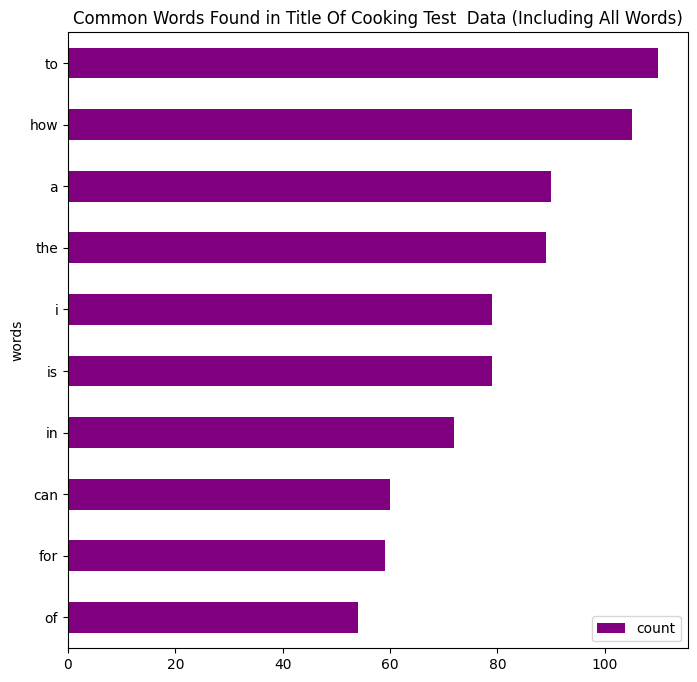

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
CleanTitle.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Title Of Cooking Test  Data (Including All Words)")

plt.show()

In [25]:
#background_df = pd.DataFrame({'Background': backgrounds})

In [26]:
background_df_list = background_df['Background'].tolist()

In [27]:
background_df_list[:3]

["We're going to try canning some homemade chili with canned kidney beans. Question: Would it be best to add the beans right before canning so they don't get over cooked or do you think there would be little difference if they were cooked with the chili before canning. I'm trying to avoid mushy beans but would like to cook a big pot and can the left overs. I usually add the beans in the last half hour of cooking anyway.",
 "Other forms of poultry are regarded as undercooked at the slightest sign of pink juices and yet it is common practice to cook duck so that it's medium rare. Is the risk of food poisoning significantly lower with duck meat than other birds?On the other hand, if we could be sure that a piece of chicken could was salmonella-free, would its texture and flavor be improved by not overcooking it? I expect the sight of pink would put most people off but if one could overcome that, could it actually taste better?",
 "I've seen this question and obviously carbon steel (not st

In [28]:
def clean_string(text): # can be Title, Background, Paragraphs
    """re.sub(pattern, repl, string).
    Returns the string obtained by replacing the leftmost
    non-overlapping occurrences of pattern in string by the
    replacement thus removing any urls
    """
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(text)).split())

In [29]:
TextOnlyBackground = [clean_string(Background) for Background in background_df_list]#can be Title, Background, Paragraphs

In [30]:
TextOnlyBackground[:1] # Can be Title, Background, Paragraphs

['Were going to try canning some homemade chili with canned kidney beans Question Would it be best to add the beans right before canning so they dont get over cooked or do you think there would be little difference if they were cooked with the chili before canning Im trying to avoid mushy beans but would like to cook a big pot and can the left overs I usually add the beans in the last half hour of cooking anyway']

In [31]:
ListlowercasewordsBackground = [Background.lower().split() for Background in TextOnlyBackground]

In [32]:
data = ListlowercasewordsBackground[:3]
for x in data:
    print(x, end=' ')

['were', 'going', 'to', 'try', 'canning', 'some', 'homemade', 'chili', 'with', 'canned', 'kidney', 'beans', 'question', 'would', 'it', 'be', 'best', 'to', 'add', 'the', 'beans', 'right', 'before', 'canning', 'so', 'they', 'dont', 'get', 'over', 'cooked', 'or', 'do', 'you', 'think', 'there', 'would', 'be', 'little', 'difference', 'if', 'they', 'were', 'cooked', 'with', 'the', 'chili', 'before', 'canning', 'im', 'trying', 'to', 'avoid', 'mushy', 'beans', 'but', 'would', 'like', 'to', 'cook', 'a', 'big', 'pot', 'and', 'can', 'the', 'left', 'overs', 'i', 'usually', 'add', 'the', 'beans', 'in', 'the', 'last', 'half', 'hour', 'of', 'cooking', 'anyway'] ['other', 'forms', 'of', 'poultry', 'are', 'regarded', 'as', 'undercooked', 'at', 'the', 'slightest', 'sign', 'of', 'pink', 'juices', 'and', 'yet', 'it', 'is', 'common', 'practice', 'to', 'cook', 'duck', 'so', 'that', 'its', 'medium', 'rare', 'is', 'the', 'risk', 'of', 'food', 'poisoning', 'significantly', 'lower', 'with', 'duck', 'meat', 'tha

In [33]:
TextOnlyBackground = list(itertools.chain(*ListlowercasewordsBackground))

In [34]:
TextOnlyBackground[:2]

['were', 'going']

In [35]:
len(TextOnlyBackground)

35935

In [36]:
UniqueWordsBackground = set(TextOnlyBackground)

In [37]:
len(UniqueWordsBackground) #15816/101330=15.6% Unique%=UniqueWords/TextOnlyTweet

4870

In [38]:
CountTextOnlyBackground = collections.Counter(TextOnlyBackground)

In [39]:
CountTextOnlyBackground.most_common(25)

[('the', 1816),
 ('i', 1287),
 ('to', 1049),
 ('a', 991),
 ('and', 823),
 ('it', 704),
 ('of', 634),
 ('in', 546),
 ('is', 521),
 ('for', 485),
 ('that', 441),
 ('with', 278),
 ('or', 278),
 ('this', 276),
 ('have', 260),
 ('but', 253),
 ('be', 236),
 ('my', 220),
 ('not', 210),
 ('on', 198),
 ('if', 182),
 ('can', 180),
 ('what', 174),
 ('as', 172),
 ('there', 155)]

In [40]:
CleanBackground = pd.DataFrame(CountTextOnlyBackground.most_common(10),
                        columns=['words', 'count'])

In [41]:
CleanBackground

,words,count
0,the,1816
1,i,1287
2,to,1049
3,a,991
4,and,823
5,it,704
6,of,634
7,in,546
8,is,521
9,for,485


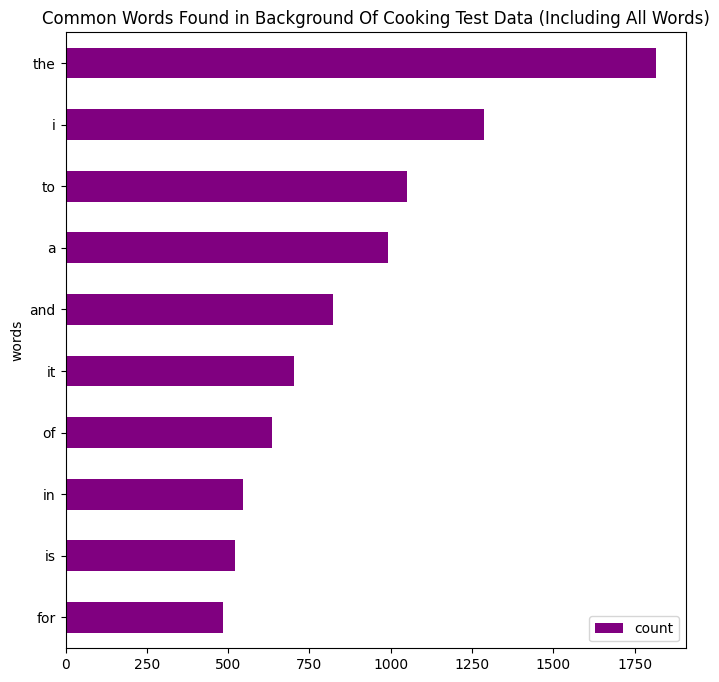

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
CleanBackground.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Background Of Cooking Test Data (Including All Words)")

plt.show()

In [43]:
#importing stop word dictionary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
#Defining The Stop Words
stop_words = set(stopwords.words('english')) #there are 179 stop words

In [45]:
# View a few words from the set
list(stop_words)[0:5]

['above', 'no', "wasn't", 'wasn', 'isn']

In [46]:
ListlowercasewordsBackground[0] #list each lower case tweet

['were',
 'going',
 'to',
 'try',
 'canning',
 'some',
 'homemade',
 'chili',
 'with',
 'canned',
 'kidney',
 'beans',
 'question',
 'would',
 'it',
 'be',
 'best',
 'to',
 'add',
 'the',
 'beans',
 'right',
 'before',
 'canning',
 'so',
 'they',
 'dont',
 'get',
 'over',
 'cooked',
 'or',
 'do',
 'you',
 'think',
 'there',
 'would',
 'be',
 'little',
 'difference',
 'if',
 'they',
 'were',
 'cooked',
 'with',
 'the',
 'chili',
 'before',
 'canning',
 'im',
 'trying',
 'to',
 'avoid',
 'mushy',
 'beans',
 'but',
 'would',
 'like',
 'to',
 'cook',
 'a',
 'big',
 'pot',
 'and',
 'can',
 'the',
 'left',
 'overs',
 'i',
 'usually',
 'add',
 'the',
 'beans',
 'in',
 'the',
 'last',
 'half',
 'hour',
 'of',
 'cooking',
 'anyway']

In [47]:
BackgroundWithoutStopwords = [[word for word in TextOnlyBackground if not word in stop_words] #works
              for TextOnlyBackground in ListlowercasewordsBackground]

In [48]:
BackgroundWithoutStopwords[0]

['going',
 'try',
 'canning',
 'homemade',
 'chili',
 'canned',
 'kidney',
 'beans',
 'question',
 'would',
 'best',
 'add',
 'beans',
 'right',
 'canning',
 'dont',
 'get',
 'cooked',
 'think',
 'would',
 'little',
 'difference',
 'cooked',
 'chili',
 'canning',
 'im',
 'trying',
 'avoid',
 'mushy',
 'beans',
 'would',
 'like',
 'cook',
 'big',
 'pot',
 'left',
 'overs',
 'usually',
 'add',
 'beans',
 'last',
 'half',
 'hour',
 'cooking',
 'anyway']

In [49]:
BackgroundWithoutStopword = list(itertools.chain(*BackgroundWithoutStopwords))

In [50]:
CountBackgroundsWithoutStopwords = collections.Counter(BackgroundWithoutStopword)

In [51]:
CountBackgroundsWithoutStopwords.most_common(10)

[('make', 153),
 ('would', 149),
 ('im', 145),
 ('use', 133),
 ('like', 123),
 ('recipe', 114),
 ('one', 96),
 ('ive', 92),
 ('cooking', 91),
 ('dont', 85)]

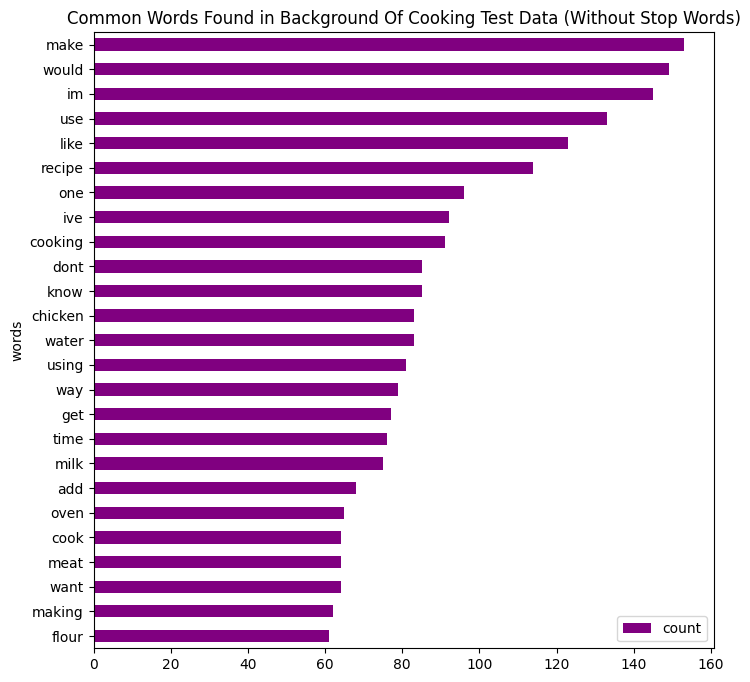

In [52]:
BackgroundWithoutStopwords = pd.DataFrame(CountBackgroundsWithoutStopwords.most_common(25),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
BackgroundWithoutStopwords.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Background Of Cooking Test Data (Without Stop Words)")

plt.show()

In [53]:
# Create list of lists containing bigrams in tweets
Backgroundbigram = [list(bigrams(Background)) for Background in BackgroundWithoutStopwords]

In [54]:
# View bigrams for the first tweet
Backgroundbigram[:]


[[('w', 'o'), ('o', 'r'), ('r', 'd'), ('d', 's')],
 [('c', 'o'), ('o', 'u'), ('u', 'n'), ('n', 't')]]

# Paragraph

In [55]:
#background_df = pd.DataFrame({'Background': backgrounds})

In [56]:
paragraphs_df_list = paragraphs_df['Paragraphs'].tolist()

In [57]:
paragraphs_df_list[:3]

[["If you are going to be canning this for long term storage you will need to be pressure canning it, and as that will mean some pretty high heat you'd be better off not cooking you beans too long before canning. I'd add them in a few minutes before the end of cooking just to get them warmed up in preparation for canning it as a half hour of cooking plus pressure canning would probably mean mush. CANNOTANSWER"],
 ['Rare duck meat is safe to eat because it does NOT contain the same risk of Salmonella as does chicken meat.Primarily because ducks, as mentioned above, have not traditionally been raised in the same squalid conditions as "factory raised" chickens - salmonella is a disease that is primarily transmitted through dirt/dirty unclean conditions. Now, on the other hand, as more and more ducks are being raised in industrial conditions, they are also becoming more likely to contain strains of Salmonella. CANNOTANSWER'],
 ['Carbon steel is more malleable and less brittle than stainles

In [58]:
TextOnlyParagraphs = [clean_string(paragraphs) for paragraphs in paragraphs_df_list]#can be Title, Background, Paragraphs

In [59]:
TextOnlyParagraphs[:1] # Can be Title, Background, Paragraphs

['If you are going to be canning this for long term storage you will need to be pressure canning it and as that will mean some pretty high heat youd be better off not cooking you beans too long before canning Id add them in a few minutes before the end of cooking just to get them warmed up in preparation for canning it as a half hour of cooking plus pressure canning would probably mean mush CANNOTANSWER']

In [60]:
ListlowercasewordsParagraphs= [Paragraphs.lower().split() for Paragraphs in TextOnlyParagraphs]

In [61]:
data = ListlowercasewordsParagraphs[:3]
for x in data:
    print(x, end=' ')

['if', 'you', 'are', 'going', 'to', 'be', 'canning', 'this', 'for', 'long', 'term', 'storage', 'you', 'will', 'need', 'to', 'be', 'pressure', 'canning', 'it', 'and', 'as', 'that', 'will', 'mean', 'some', 'pretty', 'high', 'heat', 'youd', 'be', 'better', 'off', 'not', 'cooking', 'you', 'beans', 'too', 'long', 'before', 'canning', 'id', 'add', 'them', 'in', 'a', 'few', 'minutes', 'before', 'the', 'end', 'of', 'cooking', 'just', 'to', 'get', 'them', 'warmed', 'up', 'in', 'preparation', 'for', 'canning', 'it', 'as', 'a', 'half', 'hour', 'of', 'cooking', 'plus', 'pressure', 'canning', 'would', 'probably', 'mean', 'mush', 'cannotanswer'] ['rare', 'duck', 'meat', 'is', 'safe', 'to', 'eat', 'because', 'it', 'does', 'not', 'contain', 'the', 'same', 'risk', 'of', 'salmonella', 'as', 'does', 'chicken', 'meatprimarily', 'because', 'ducks', 'as', 'mentioned', 'above', 'have', 'not', 'traditionally', 'been', 'raised', 'in', 'the', 'same', 'squalid', 'conditions', 'as', 'factory', 'raised', 'chickens

In [62]:
TextOnlyParagraphs = list(itertools.chain(*ListlowercasewordsParagraphs))

In [63]:
TextOnlyParagraphs[:2]

['if', 'you']

In [64]:
len(TextOnlyParagraphs)

45931

In [65]:
UniqueWordsParagraphs = set(TextOnlyParagraphs)

In [66]:
len(UniqueWordsParagraphs) #15816/101330=15.6% Unique%=UniqueWords/TextOnlyTweet

5691

In [67]:
ParagraphsWithoutStopwords = [[word for word in TextOnlyParagraphs if not word in stop_words] #works
              for TextOnlyParagraphs in ListlowercasewordsParagraphs]

In [68]:
ParagraphsWithoutStopwords[0]

['going',
 'canning',
 'long',
 'term',
 'storage',
 'need',
 'pressure',
 'canning',
 'mean',
 'pretty',
 'high',
 'heat',
 'youd',
 'better',
 'cooking',
 'beans',
 'long',
 'canning',
 'id',
 'add',
 'minutes',
 'end',
 'cooking',
 'get',
 'warmed',
 'preparation',
 'canning',
 'half',
 'hour',
 'cooking',
 'plus',
 'pressure',
 'canning',
 'would',
 'probably',
 'mean',
 'mush',
 'cannotanswer']

In [69]:
ParagraphsWithoutStopword = list(itertools.chain(*ParagraphsWithoutStopwords))

In [70]:
CountParagraphsWithoutStopwords = collections.Counter(ParagraphsWithoutStopword)

In [71]:
CountParagraphsWithoutStopwords.most_common(10)

[('cannotanswer', 400),
 ('use', 195),
 ('would', 177),
 ('water', 154),
 ('like', 153),
 ('time', 137),
 ('get', 133),
 ('dont', 125),
 ('make', 124),
 ('cooking', 116)]

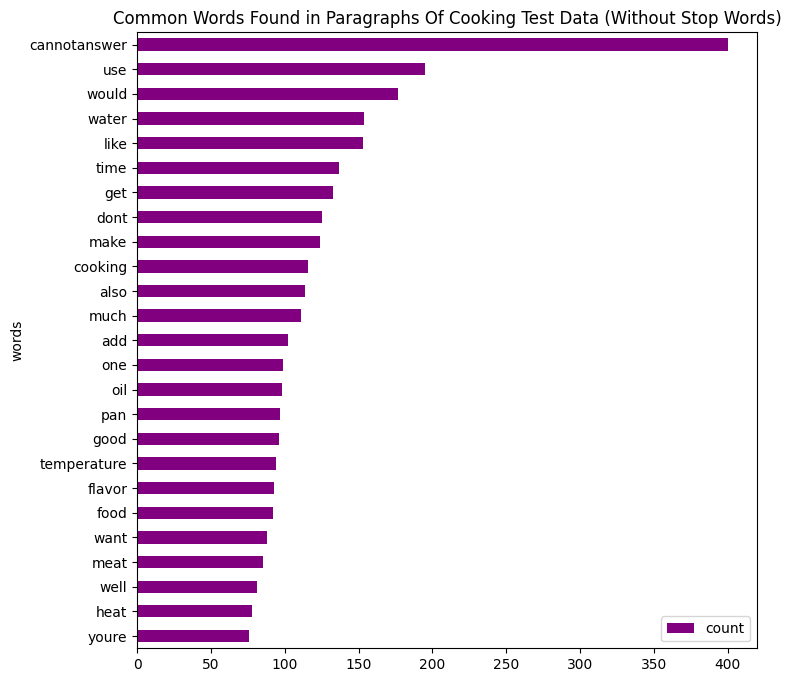

In [72]:
ParagraphsWithoutStopwords = pd.DataFrame(CountParagraphsWithoutStopwords.most_common(25),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ParagraphsWithoutStopwords.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Paragraphs Of Cooking Test Data (Without Stop Words)")

plt.show()

In [73]:
# Create list of lists containing bigrams in tweets
Paragraphsbigram = [list(bigrams(Paragraphs)) for Paragraphs in ParagraphsWithoutStopwords]

In [74]:
# View bigrams for the first tweet
Paragraphsbigram[:]

[[('w', 'o'), ('o', 'r'), ('r', 'd'), ('d', 's')],
 [('c', 'o'), ('o', 'u'), ('u', 'n'), ('n', 't')]]